# Ham or Spam
Actual message or a spam

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.columns = ['class', 'text']
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


We will predict if class is ham or not. This is a classification problem.

In [5]:
import seaborn as sns

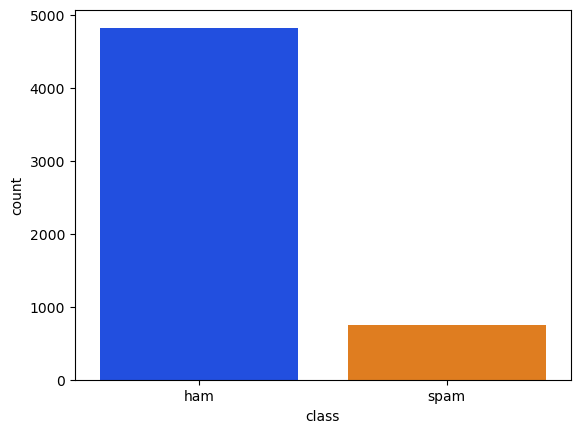

In [6]:
sns.countplot(x=df['class'], palette='bright');

In [7]:
df.shape

(5572, 2)

In [8]:
df['class'].value_counts()

class
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
df['class'].isnull().sum()

0

In [10]:
df['class'] = df['class'].map({ 'ham': 0, 'spam': 1 })
df.head()

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Starting an NLP project

1. Convert all to lowecase
2. Remove punctiation
3. Remove numbers
4. Remove newline characters
5. Remove stopwords (unnecessary words)
6. Tokenize
7. use Lemma & Stemma to get the stem of the words
8. Vectorize

In [11]:
def nlp_prep(col):
    col = col.str.lower()
    col = col.str.replace('[^\w\s]', '')
    col = col.str.replace('\n', '')
    col = col.str.replace('\d+', '')
    col = col.str.replace('\r', '')

    return col

In [12]:
df['text'] = nlp_prep(df['text'])

In [13]:
df.head()

,class,text
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [14]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def wc(data, bgcolor='white'):
    plt.figure(figsize=(10, 10))
    mask = np.array(Image.open('heart.png'))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [16]:
ham = df[df['class'] == 0]['text']
spam = df[df['class'] == 1]['text']

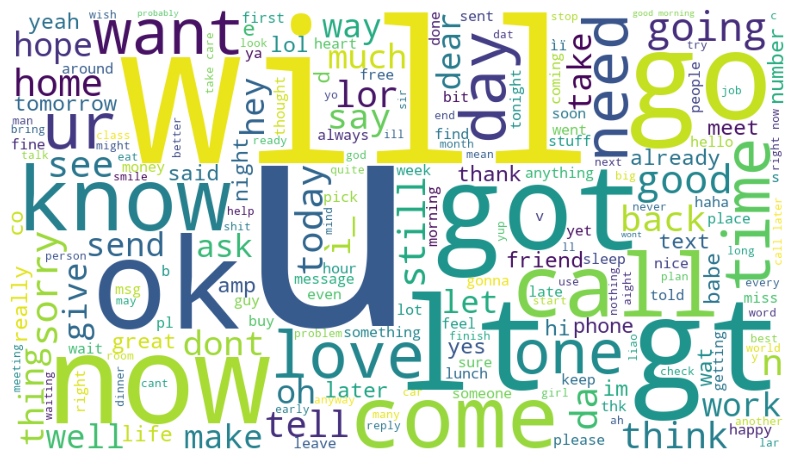

In [17]:
wc(ham)

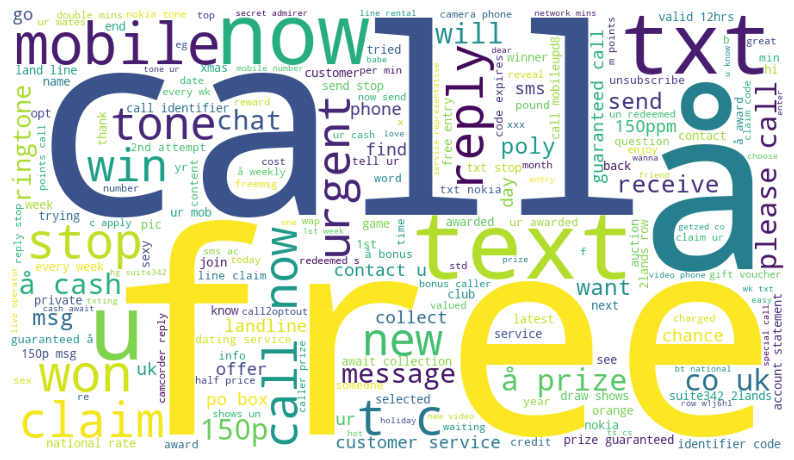

In [18]:
wc(spam)

In [19]:
x = df['text']
y = df['class']

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.feature_extraction.text import CountVectorizer as cv
from nltk.stem import PorterStemmer
from textblob import TextBlob

In [22]:
pr = PorterStemmer()

In [23]:
def lemmafn(text):
    words = TextBlob(text).words
    return [pr.stem(word) for word in words]

In [24]:
v = cv(stop_words='english', ngram_range=(1, 2), analyzer=lemmafn)

In [25]:
x = v.fit_transform(x)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.2)

In [27]:
mnb = MultinomialNB()

In [28]:
model = mnb.fit(x_train, y_train)

In [30]:
pred = model.predict(x_test)

In [31]:
accuracy_score(pred, y_test)

0.97847533632287